**1. Подключаем библиотеки**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as sk
import skimage


In [2]:
from datetime import datetime

#start_time = datetime.now()
#print("Время выполнения: ", datetime.now() - start_time)

**2.Получаем доступ к данным** Т.к. изображения рисинок уже рассортированы по папкам с названиями видов, то отсюда информацию о названиях видов и возьмём

In [3]:
Path = '/home/art/Project/Project1/Rice_Image_Dataset_1'
Species=os.listdir(Path)
#del(Species[1])#игнорируем текстовый файл, он чисто описательный
print("Виды турецкого риса: " + ', '.join(Species))

Виды турецкого риса: Basmati, Jasmine, Ipsala, Karacadag, Arborio


**3.Загружем данные** С целью ускорения процесса, масштабируем изображения и делаем их полностью серыми (уходим от RGB-формата). Для работы нейросети производим спрямление массивов

In [4]:
start_time = datetime.now()
rescale = skimage.transform.rescale
imread = skimage.io.imread
Data = {'Image':[0]*30000, 'Species':[0]*30000}
n = 0
for categoty in Species:
    print("Работаем с "+categoty)
    for string in os.listdir(Path+'/'+categoty):
        image = rescale(imread(Path+'/'+categoty+'/'+string), 0.24, anti_aliasing=False)
        Data['Image'][n]=list(image.reshape(image.shape[0]**2))
        Data['Species'][n]=categoty
        n+=1
print("Конец загрузки изображений")
Data = pd.DataFrame(Data).sample(frac=1)
print("Время выполнения: ", datetime.now() - start_time)

Работаем с Basmati
Работаем с Jasmine
Работаем с Ipsala
Работаем с Karacadag
Работаем с Arborio
Конец загрузки изображений
Время выполнения:  0:01:07.107647


In [5]:
Data

,Image,Species
22168,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Karacadag
15400,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ipsala
19795,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Karacadag
25167,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio
25363,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio
...,...,...
12385,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ipsala
24728,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio
9070,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Jasmine
13971,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ipsala


Демонстрируем возможностб частично восстановить изображение
Также проводим разбиени данных на обучающую и тестовую выборку

In [5]:
from sklearn.model_selection import train_test_split
#f=np.array(Data['Image'][0])
#skimage.io.imshow(f.reshape((round(np.sqrt(f.shape[0])),round(np.sqrt(f.shape[0])),1)))
#print('Рисинка')
X_train, X_test, y_train, y_test = train_test_split(Data['Image'],Data['Species'],random_state=0,test_size = 10000)
float(len(X_test))/len(Data['Image'])
Data=0

Подключаем нейросеть, используем метод близжайшего соседа
Преобразуем данные в формат, с которым классификатор согласен работать

In [6]:
print(X_train)
print(y_train)

28303    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5961     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2110     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
14079    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6377     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
12309    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
14762    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
689      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7648     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5577     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Image, Length: 20000, dtype: object
28303    Arborio
5961     Basmati
2110     Basmati
14079     Ipsala
6377     Jasmine
          ...   
12309     Ipsala
14762     Ipsala
689      Basmati
7648     Jasmine
5577     Basmati
Name: Species, Length: 20000, dtype: object


In [7]:
X_train = np.array(list(X_train))
#y_train_1 = list(y_train)
X_test = np.array(list(X_test))

In [7]:
start_time = datetime.now()
from sklearn.neural_network import MLPClassifier
cnn = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(300, 12), random_state=1)
cnn.fit(X_train, y_train)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:01:02.282271


/home/art/envs/project/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Проверяем работоспособность нашей модели

Время выполнения:  0:00:02.478901
Доля правильных ответов -  96.61 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

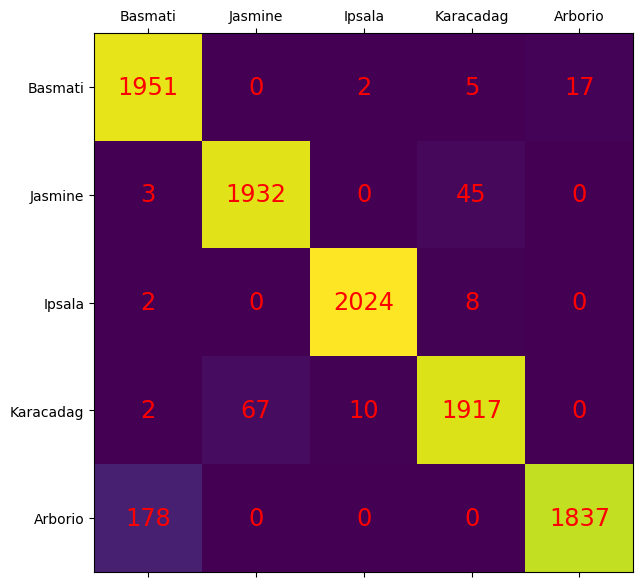

In [10]:
start_time = datetime.now()
Prediction = cnn.predict(X_test)
print("Время выполнения: ", datetime.now() - start_time)

from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
start_time = datetime.now()
estimator = KNeighborsClassifier(n_neighbors=3)
estimator.fit(X_train_1, y_train)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:00:00.074261


In [12]:
start_time = datetime.now()
Prediction = estimator.predict(X_test)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:00:15.380504


Доля правильных ответов -  97.42 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

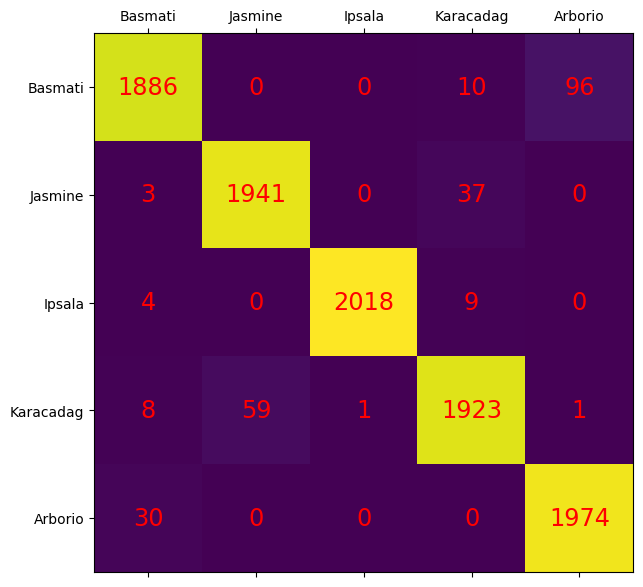

In [13]:
from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)

In [7]:
from sklearn import tree
start_time = datetime.now()
estimator = sk.tree.DecisionTreeClassifier(random_state=42)
estimator.fit(X_train, y_train)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:00:26.498516


In [9]:
Prediction = estimator.predict(X_test)
sk.metrics.accuracy_score(Prediction, y_test)

0.9273

Доля правильных ответов -  92.73 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

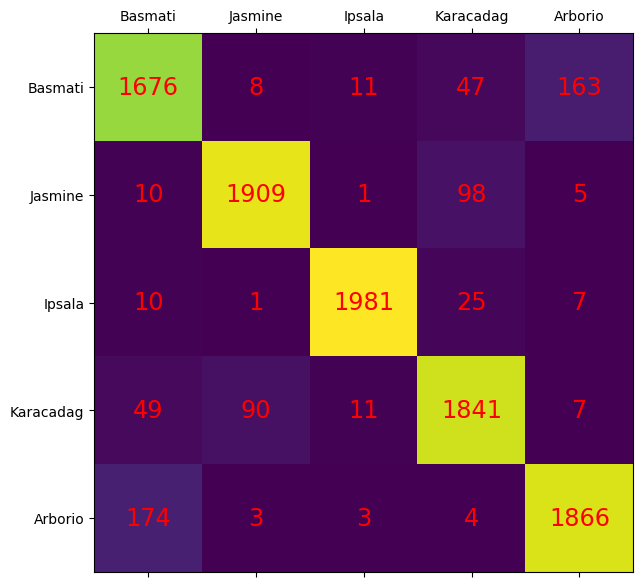

In [10]:
from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)

In [8]:
start_time = datetime.now()
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=30, random_state=42)
estimator.fit(X_train, y_train)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:00:07.110562


In [10]:
start_time = datetime.now()
Prediction = estimator.predict(X_test)
sk.metrics.accuracy_score(Prediction, y_test)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:00:00.176825


Доля правильных ответов -  97.56 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

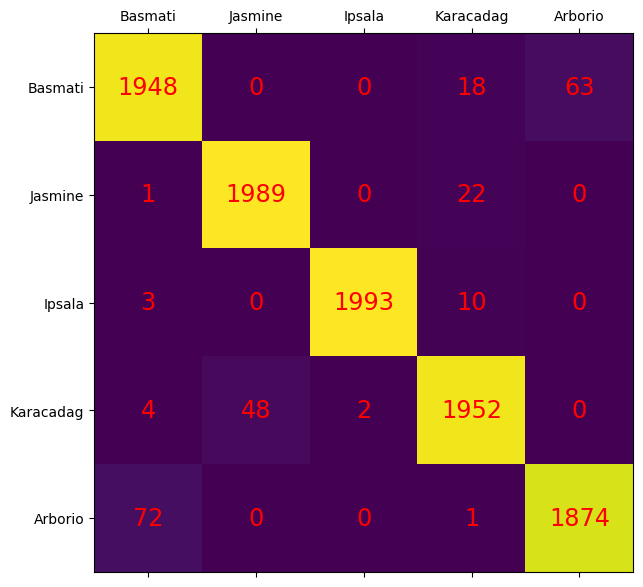

In [11]:
from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)

In [13]:
start_time = datetime.now()
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(n_estimators=30, max_depth = 3)
estimator.fit(X_train, y_train)
print("Время выполнения: ", datetime.now() - start_time)

Время выполнения:  0:10:45.869443


In [14]:
Prediction = estimator.predict(X_test_1)
sk.metrics.accuracy_score(Prediction, y_test)

0.9458

Доля правильных ответов -  94.58 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

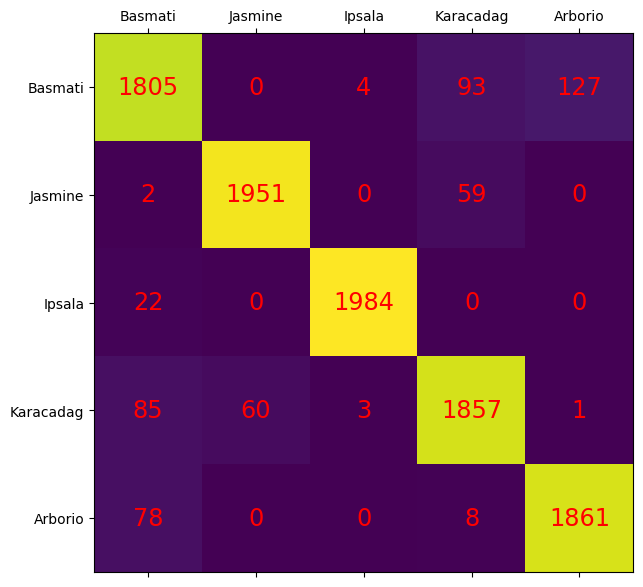

In [15]:
X_test_1 = np.array(list(X_test))

from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(n_estimators=30)
estimator.fit(X_train_1, y_train_1)

GradientBoostingClassifier(n_estimators=30)

In [25]:
Prediction = estimator.predict(X_test_1)
sk.metrics.accuracy_score(Prediction, y_test)

0.9357

Доля правильных ответов -  93.57 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

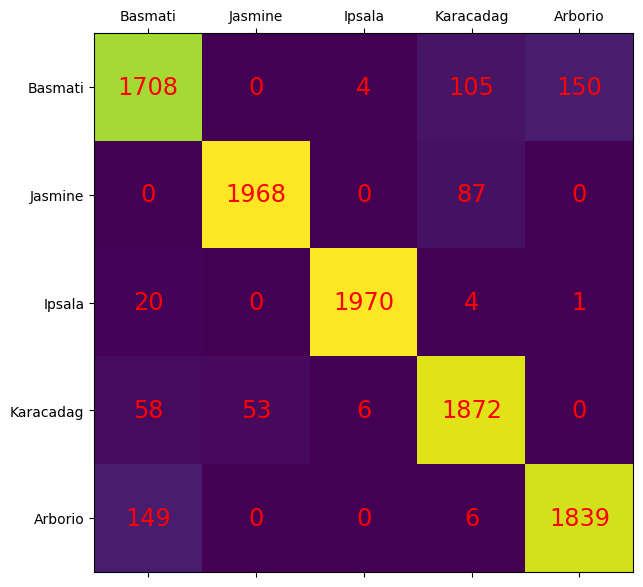

In [26]:
X_test_1 = np.array(list(X_test))

from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)